# Instacart Visualisation

In [1]:
import pandas as pd
import numpy as ny
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 4 - Python Fundemental For Data Analyst'

In [5]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Data Immersion\\Achievement 4 - Python Fundemental For Data Analyst'

In [7]:
final_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merge.pkl'))

In [9]:
final_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order frequency flag,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [13]:
final_merge['income'].max()

593901

### Orders Per Hours Histogram

In [17]:
final_merge['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

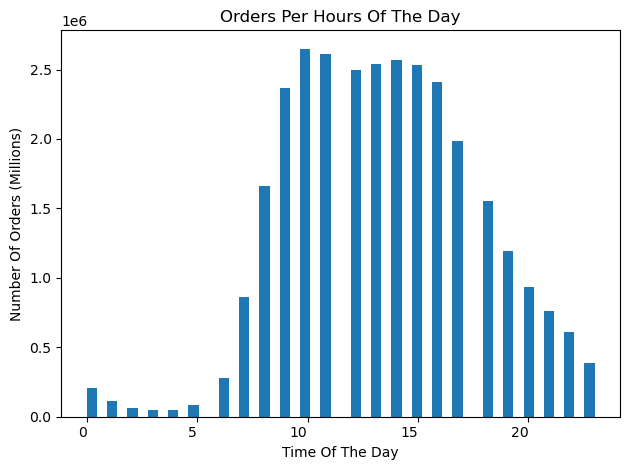

In [39]:
order_hour_of_day_hist = final_merge['order_hour_of_day'].plot.hist(bins = 50)
plt.title('Orders Per Hours Of The Day')
plt.ylabel('Number Of Orders (Millions)') 
plt.xlabel('Time Of The Day')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.savefig('order_hour_of_day_hist', dpi=300, bbox_inches='tight')

#### The histogram clearly shows which hours of the day most customers do their shopping. sales gradually increase from 6 AM before peaking at 10 AM

#### sales are maintained until 4PM before gradually decreasing

### Customer Loyalty Bar Chart

In [19]:
final_merge['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal_customer      10284093
New customer         6243990
Name: count, dtype: int64

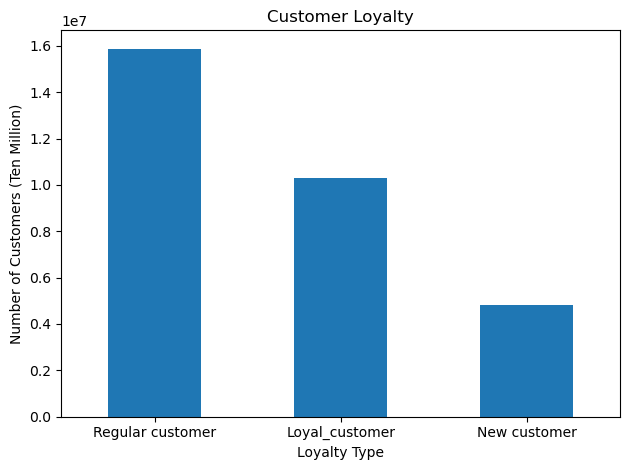

In [11]:
loyalty_flag_bar = final_merge['loyalty_flag'].value_counts().plot.bar()
plt.title('Customer Loyalty')
plt.ylabel('Number of Customers (Ten Million)')
plt.xlabel('Loyalty Type')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('loyalty_flag_ba', dpi=300, bbox_inches='tight')

#### Majority of customers who shop with instacart are regular customers

### Prices and Hour of day linechart

In [ ]:
## firstly due to the size of the df, I will be creating a sample subset

In [13]:
ny.random.seed(4)
dev = ny.random.rand(len(final_merge)) <= 0.7

In [15]:
big= final_merge[dev]

In [17]:
small = final_merge[~dev]

In [31]:
len(final_merge)

32404859

In [33]:
len(big)+len(small)

32404859

In [ ]:
## Do to only  using the price and hours of day columns, I will be reducing the subset to only include these columns

In [18]:
df_1 = small[['prices','order_hour_of_day']]

In [21]:
df_1.shape

(9288468, 2)

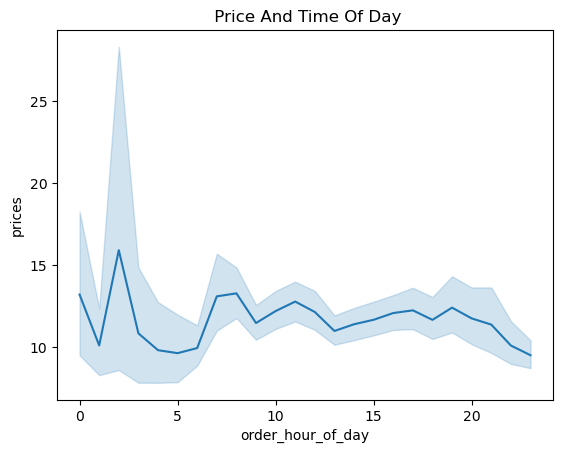

In [44]:
hour_price_line = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices').set(title=" Price And Time Of Day")
plt.savefig("hour_price_line.png")

### Family and Age Line Chart

In [ ]:
## i will fistly adjust the sample again to only include age and dependants 

In [35]:
df_2 = small[['age','dependants']]

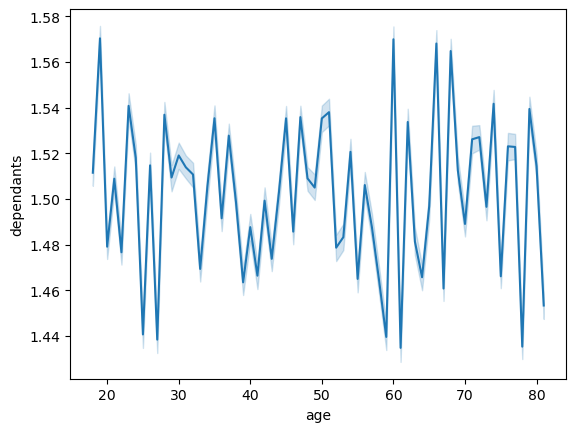

In [69]:
age_dependants_line = sns.lineplot(data = df_2, x = 'age',y = 'dependants')
plt.savefig("age_dependants_line")

#### No correlation between age and the family Environment.

### Age and Spending Scatterplot

In [ ]:
## Adjusting the sample set to only include the relevant columns 

In [19]:
df_3 = small[['age','income']]

In [47]:
df_3.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


In [51]:
df_3.shape

(9721098, 2)

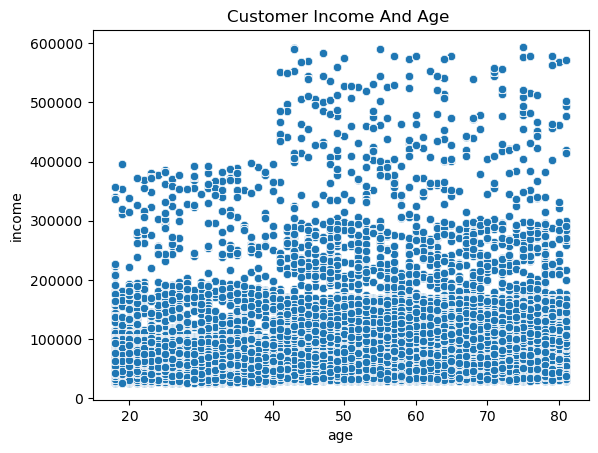

In [21]:
age_income_scatter = sns.scatterplot(x = 'age', y = 'income',data = df_3).set(title="Customer Income And Age ")
plt.savefig("age_income_scatter")

#### Income increases from the age of 40 years old